<h1>AG002 - Projeto 2023.1</h1>
<h2>Treinamento de modelos ML classificatórios utilizando o dataset "palmerpenguins"</h2>
<h3>Instituto Nacional de Telecomunicações - Santa Rita do Sapucaí MG.</h3>
<ul>
    <li>
        <h4>Aluno: Vitor André Brochado Wogel da Costa - 49 - GES</h4>
    </li>
    <li>
        <h4>Professor: Renzo Paranaíba Mesquita</h4>
    </li>
</ul>

Antes de começar, é importante que você crie uma pasta <i>data</i> dentro de <i>src</i> que contenha o csv disponibilizado no PDF explicativo da AG002

Importando libs

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import joblib as joblib
import os

Leitura do CSV

In [48]:
# create data dir if you don't have it
os.makedirs("data", exist_ok=True)

In [49]:
df = pd.read_csv("data/palmerpenguins.csv")

Informações iniciais sobre o CSV

In [50]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [52]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


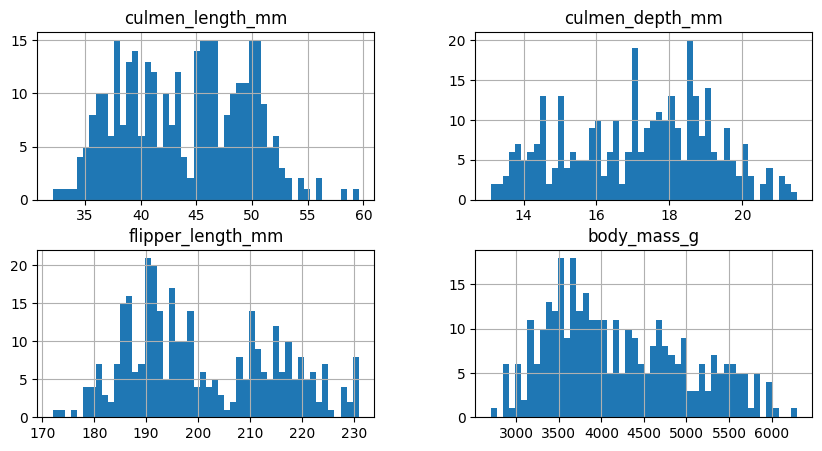

In [53]:
df.hist(bins=50, figsize=(10,5))
plt.show()

Conversão das variáveis categóricas para atributos numéricos

In [54]:
df["island"].replace({"Torgersen": 2, "Biscoe": 0, "Dream": 1}, inplace=True)
df["sex"].replace({"MALE": 1, "FEMALE": 0}, inplace=True)
df["species"].replace({"Adelie": 0, "Chinstrap": 1, "Gentoo": 2}, inplace=True)

Reordenando as colunas

In [55]:
df = df.reindex(columns=["island", "sex", "culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g", "species"])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             333 non-null    int64  
 1   sex                333 non-null    int64  
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   species            333 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 18.3 KB


In [57]:
df.isna().sum()

island               0
sex                  0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
species              0
dtype: int64

Divisão entre dataset de treino e teste com proporção 80-20

In [58]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print(len(train_set))
print(len(test_set))

266
67


Dividindo as colunas entre features e labels

In [59]:
train_features = train_set.drop(columns=["species"])
train_labels = train_set["species"]

test_features = test_set.drop(columns=["species"])
test_labels = test_set["species"]

Otimização de hiperparâmetros

In [60]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=10, scoring='accuracy')

grid_search.fit(train_features, train_labels)

best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(test_features)
print(classification_report(test_labels, y_pred))

Melhores hiperparâmetros: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        31
           1       0.75      0.69      0.72        13
           2       0.96      0.96      0.96        23

    accuracy                           0.88        67
   macro avg       0.86      0.85      0.86        67
weighted avg       0.88      0.88      0.88        67



Os resultados acima mostram que o modelo k-Nearest Neighbors obteve suas melhores métricas utilizando os parâmetros listados no output, fora isso é relevante anotar que a precisão média entre as classes é de 86%, recall de 85% e f1-score de 85,6%, além de acurácia média de 88%.

Vamos treinar e salvar o modelo <i>KNeighborsClassifier</i>

In [61]:
model = KNeighborsClassifier(n_neighbors=best_params["n_neighbors"], weights=best_params["weights"], metric=best_params["metric"])

model.fit(train_features, train_labels)
y_pred = model.predict(test_features)
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        31
           1       0.75      0.69      0.72        13
           2       0.96      0.96      0.96        23

    accuracy                           0.88        67
   macro avg       0.86      0.85      0.86        67
weighted avg       0.88      0.88      0.88        67



In [62]:
joblib.dump(model, "./data/knn_model.sav")

['./data/knn_model.sav']